In [1]:
import numpy as np
from scipy.sparse import csr_matrix, load_npz, vstack, save_npz

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

In [3]:
from sklearn.feature_selection import VarianceThreshold

### Reading numpy files

In [4]:
Xtrain = np.load('Xtrain.npy')
Xtrain.shape

(842, 7493)

In [5]:
Ytrain = np.load('Ytrain.npy')
Ytrain.shape

(842, 71)

In [9]:
n_train = Xtrain.shape[0]
n_train

842

In [8]:
Xtest = np.load('Xtest.npy')
Xtest.shape

(2449, 7493)

In [10]:
n_test = Xtest.shape[0]
n_test

2449

### Merging

In [13]:
feature = np.concatenate((Xtrain, Xtest), axis=0)
feature.shape

(3291, 7493)

In [14]:
# label = np.concatenate([label_inga, label_silico], axis=0)
# label.shape

### Distribution of features

In [15]:
n_unique = np.apply_along_axis(lambda x: np.unique(x).size, 0, feature)
n_unique

array([3251,    2,    2, ...,    2,    2,    2])

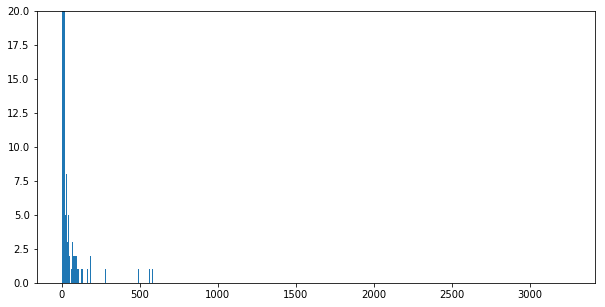

In [16]:
plt.hist(n_unique, bins=n_unique.max()-n_unique.min()+1)
plt.ylim([0,20])
plt.show()

### Dropping invariant columns

In [17]:
vt = VarianceThreshold()

In [18]:
selected_Xtrain = vt.fit(Xtrain, Ytrain).get_support()
selected_Xtrain

array([ True, False, False, ...,  True,  True, False], dtype=bool)

In [19]:
selected_Xtest = vt.fit(Xtest).get_support()
selected_Xtest

array([ True,  True,  True, ..., False, False,  True], dtype=bool)

In [20]:
new_feature = feature[:,selected_Xtrain & selected_Xtest]
new_feature.shape

(3291, 1257)

In [21]:
new_feature2 = vt.transform(feature)
new_feature2.shape

(3291, 6849)

### Separating

In [22]:
new_feature_Xtrain = new_feature[:n_train]
new_feature_Xtrain.shape

(842, 1257)

In [23]:
new_feature_Xtest = new_feature[n_train:]
new_feature_Xtest.shape

(2449, 1257)

### Writing numpy files

In [24]:
np.save('Xtrain_dropped', new_feature_Xtrain)

In [25]:
np.save('Xtest_dropped', new_feature_Xtest)